# HW 6

1. Translating Sentences:
10 pts
Write a function that translates sentences. The function takes two arguements, the sentence to be translated and tthe targeted language and returns the translated sentence.

In [ ]:
from googletrans import Translator
from googletrans import LANGUAGES

def list_supported_languages():
    """
    Returns a dictionary of supported languages by Google Translate.

    The dictionary keys are language codes (ISO 639-1 format), 
    and the values are the corresponding language names.

    Example:
        {'en': 'english', 'fr': 'french', 'es': 'spanish', ...}

    Returns:
        dict: A dictionary where keys are language codes and values are language names
    """
    return LANGUAGES

def translation(sentence, language):
    """
    Translates a given sentence into the specified language using Google Translate.

    Arguments:
        sentence (str): The sentence to be translated
        language (str): The language code of the target language (e.g., 'fr' for French)

    Returns:
        str: The translated sentence
    
    Example:
        translation("Hello", "fr")  # Returns "Bonjour"
    """
    translator = Translator()
    translated_text = translator.translate(sentence, dest=language)
    return translated_text.text

# Example usage
supported_languages = list_supported_languages()
for code, lang in supported_languages.items():
    # Print each supported language and its corresponding code in a readable format
    print(f"{lang.capitalize()} ({code})")

# Get a sentence to be translated from the user
question = input('Give me a sentence: ')

# Get the target language code from the user
lang = input('Pick from a language code above: ')

# Translate the input sentence into the selected language
translated_sentence = translation(question, lang)

# Output the translated sentence to the user
print(f'Translated sentence: {translated_sentence}')

# Your code here:

# Translate the given sentence into Spanish ('es' is the language code for Spanish)
en_es = translation('''Make a career of humanity. Commit yourself to the noble struggle for equal rights.
You will make a better person of yourself, a greater nation of your country, and a finer world to live in.''', 'es')

# Output the translated sentence to the user
print(f'Translated sentence: {en_es}')

'Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir.'

Take the following sentence and translate it from English to Spanish.
"Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."

2. Now translate it from Spanish to Chinese
2.5pts

In [ ]:
# Your code here:

# Translate the given Spanish sentence into Simplified Chinese ('zh-cn' is the language code for Simplified Chinese)
es_ch = translation(en_es, 'zh-cn')

# Output the translated sentence to the user
print(f'Translated sentence: {es_ch}')

'从事人类的职业。致力于争取平等权利的崇高斗争。您将使自己成为一个更好的人，一个更大的国家和一个更美好的世界。'

3. Now translate it from Chinese back to English.
2.5pts

In [ ]:
# Your code here:

# Translate the given Spanish sentence into English ('en' is the language code for English)
ch_en = translation(es_ch, 'en')

# Output the translated sentence to the user
print(f'Translated sentence: {ch_en}')

'Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in.'

4. Now do the same thing with ChatGPT.

2.5pts
Eng to Sp: Sp to Chinese: Chinese to Eng:

Step 1: English to Spanish
"Haz una carrera de la humanidad. Comprométete con la noble lucha por los derechos iguales. Te harás una mejor persona, una nación más grande de tu país y un mundo mejor para vivir."

Step 2: Spanish to Chinese (Simplified)
"从事人类事业。致力于为平等权利而进行的崇高斗争。你会让自己成为一个更好的人，让你的国家成为一个更伟大的国家，让世界更美好。"

Step 3: Chinese to English
"Pursue a career in humanity. Devote yourself to the noble struggle for equal rights. You will make yourself a better person, make your country a greater nation, and make the world a better place."



5. Describe the difference in quality and features of output:
2.5pts

Your answer here:


 ## 7.  The Trump Card
Here is a link to a speech made by former President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trump's speech only, remove stopwords and perform a word frequency distribution and visualize it.
20pts

In [9]:
import requests
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist


In [ ]:
# Define the URL for the article
base_url = 'https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial'

# Send a GET request to the URL and store the response
r = requests.get(base_url)

# Parse the HTML content of the response using BeautifulSoup
soup = BeautifulSoup(r.text)

# Find all paragraph tags <p> in the HTML and extract their text content
paragraphs = soup.find_all('p')

# Empty list to store the words
document = []

# Loop through paragraphs from index 10 to 273 (assuming 10-273 is the desired range for the speech content)
for paragraph in paragraphs[10:273]:
    speech = paragraph.get_text().strip()  # Extract text from the paragraph and strip any surrounding whitespace
    words = word_tokenize(speech)  # Tokenize the paragraph into words using word_tokenize() from NLTK
    document.extend(words)  # Add the tokenized words to the document list

# Print the final document list, which contains all words from the selected paragraphs
print(document)

[('people', 80), ('going', 73), ('want', 67), ('know', 58), ('get', 49), ('country', 43), ('ballots', 43), ('got', 42), ('votes', 41), ('election', 40), ('back', 40), ('go', 38), ('said', 37), ('state', 36), ('one', 34), ('like', 32), ('way', 32), ('say', 31), ('right', 29), ('vote', 29)]


<Axes: xlabel='Samples', ylabel='Counts'>

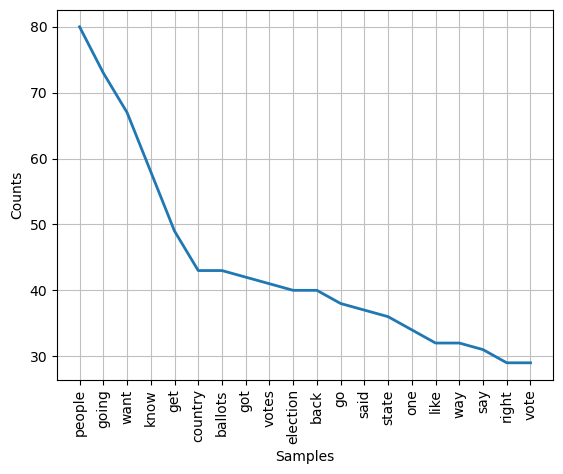

In [11]:
# Retrieve English stopwords and extend with additional custom stopwords
stopwords_list = stopwords.words("english")
new_stops = [",", "I", ".", ";", "-", ":", "-", "©","?", "’", "``","'s","n't","'re","''","'ve"]  # Including additional symbols to remove
stopwords_list.extend(new_stops)

# Filter out stopwords (case-insensitive) from the tokenized words
clean_trump = [word for word in document if word.lower() not in stopwords_list]

# Create a frequency distribution of the cleaned words
fdist = FreqDist(clean_trump)

# Print the 20 most common words
x = fdist.most_common(20)
print(x)

# Plot the frequency distribution of the top 20 words
fdist.plot(20)

8. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt
   
What are the 10 most common things Donald Trump "loves?"
10pts

In [13]:
#Your code and answer here:
from nltk.tokenize import sent_tokenize
import requests

# Download the speeches.txt from the GitHub repository
url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url)
speeches_text = response.text

# Tokenize the text into sentences
lines = sent_tokenize(speeches_text)

# List to store phrases after 'I love'
lovely = []

# Loop through sentences and find phrases after 'I love'
for sentence in lines:
    if 'I love' in sentence:
        start = sentence.find('I love') + len('I love')  # Find the start index of the phrase after 'I love'
        end = sentence.find('.', start)  # Correctly refer to 'sentence', find sentence-ending punctuation
        if end == -1:  # If no punctuation is found, take the rest of the sentence
            end = len(sentence)
        trump_love = sentence[start:end].strip()  # Extract and clean the phrase
        lovely.append(trump_love)  # Add the extracted phrase to the list

# Dictionary to store counts of phrases
love_counts = {}

# Count occurrences of each phrase in 'lovely'
for loved_thing in lovely:
    if loved_thing in love_counts:
        love_counts[loved_thing] += 1  # Increment count if phrase already exists
    else:
        love_counts[loved_thing] = 1  # Initialize count for new phrases

# Get the top 10 most loved phrases
top_10_loves = sorted(love_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the result
for item, count in top_10_loves:
    print(f'{item}: {count} times')

you: 7 times
it: 7 times
them: 6 times
the people: 5 times
you all: 5 times
China: 4 times
you too: 4 times
Mexico: 3 times
the Hispanics: 3 times
d it: 3 times


9. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?
10pts

In [14]:
#Your code and answer here:
import requests
import pycountry

# Download the speeches.txt from the GitHub repository
url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url)
speeches_text = response.text.lower()  # Convert text to lowercase for case-insensitive matching

# Define a list of countries (convert country names to lowercase for consistent matching)
countries = [country.name.lower() for country in pycountry.countries]

# Create an empty dictionary to store the counts of each country
country_counts = {}

# Loop through the list of countries and count their occurrences in the text
for country in countries:
    count = speeches_text.count(country)  # Count how many times the country appears
    if count > 0:
        country_counts[country] = count

# Sort the dictionary by count in descending order and exclude 'america' and 'united states'
sorted_countries = sorted(
    [(country, count) for country, count in country_counts.items() if country not in ['america', 'united states']],
    key=lambda x: x[1], reverse=True
)

# Get the top 5 most mentioned countries
top_5_countries = sorted_countries[:5]

# Display the result
for country, count in top_5_countries:
    print(f'{country.title()}: {count} times')


China: 201 times
Mexico: 160 times
Israel: 86 times
Iraq: 72 times
Japan: 69 times



 In class we talked about tokenizing sentences into words, or parsing texts by single words(unigrams), or two words(bigrams). But you can also tokenize by sentences. Here is some sample code:


In [15]:
import nltk
from nltk.tokenize import sent_tokenize

text = "This is the first sentence. This is the second sentence."
sentences = sent_tokenize(text)

print(sentences)

['This is the first sentence.', 'This is the second sentence.']


In class we talked about final projects and I suggested one of the interesting uses of this technology is to consider conventional thinking on some subject and use Python to more comprehensively and critically evaluate that thinking. We touched on "political thinking" as a good place to apply Python language analyses. In political speeches, certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." 

Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses: "Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association. These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."  
*This is not to say I agree or disagree with this analysis.*  This is just one example of what we touched on in class. 

10. Perform a frequency analysis that provides evidence for or against the assertion made in the Vox article.
Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!
20pts

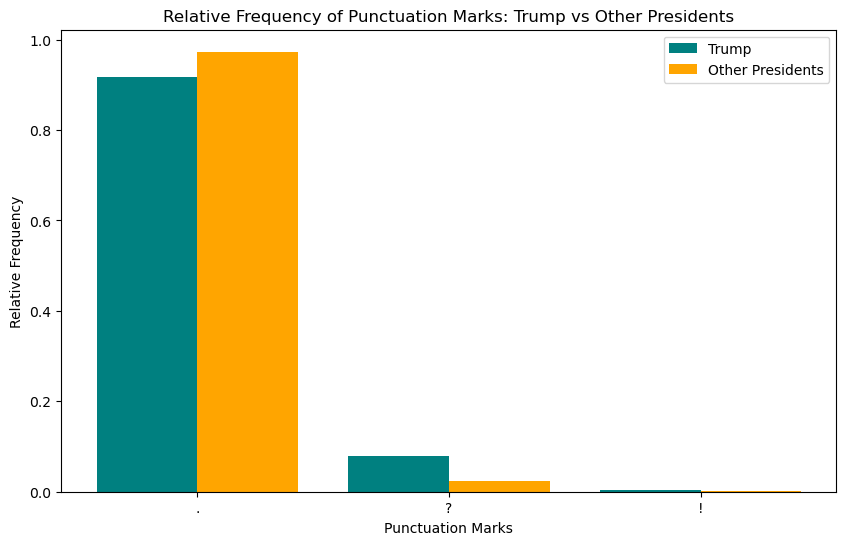

In [16]:
#Your code and response here:
# Import necessary modules
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import inaugural
import requests
import matplotlib.pyplot as plt

# Define the punctuation marks we want to analyze
punctuation_marks = ['.', '?', '!']

# Function to calculate relative frequency of punctuation marks
def get_relative_punctuation_frequencies(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase for consistency
    # Filter for punctuation marks
    punctuations = [mark for mark in words if mark in punctuation_marks]
    # Create frequency distribution of the punctuation marks
    fdist = FreqDist(punctuations)
    # Total count of all punctuation marks
    total_punctuations = sum(fdist[mark] for mark in punctuation_marks)
    # Calculate relative frequency for each punctuation mark
    if total_punctuations > 0:
        return [fdist[mark] / total_punctuations for mark in punctuation_marks]
    else:
        return [0, 0, 0]  # Return 0 frequency if no punctuations found

# Fetch Trump's speeches
url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url)
trump_text = response.text

# Calculate relative frequencies for Trump's speeches
trump_relative_frequencies = get_relative_punctuation_frequencies(trump_text)

# Fetch and combine all other presidents' inaugural speeches
inaugural_text = ' '.join([' '.join(inaugural.words(file)) for file in inaugural.fileids() if 'Trump' not in file])

# Calculate relative frequencies for other presidents' speeches
other_presidents_relative_frequencies = get_relative_punctuation_frequencies(inaugural_text)

# Plot the comparison
plt.figure(figsize=(10, 6))
x = range(len(punctuation_marks))
plt.bar(x, trump_relative_frequencies, width=0.4, label="Trump", color="teal", align='center')
plt.bar([i + 0.4 for i in x], other_presidents_relative_frequencies, width=0.4, label="Other Presidents", color="orange", align='center')
plt.xticks([i + 0.2 for i in x], punctuation_marks)
plt.xlabel("Punctuation Marks")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency of Punctuation Marks: Trump vs Other Presidents")
plt.legend()
plt.show()


## 6. Mired in Mango Madness ##
20pts

Congratulations! In your last semester at Yale, you got a job at the World Bank ! 

Your first assignment is to address the dearth of good data in Mali on Mango quality and production. Your boss put you on a plane to Mali during the harvest season. You are excited, not only because your boss is annoying and wears too much cologne, but international travel is part of the excitement of an international job. You are excited to see the Great Mosque of Djenne, to watch the sunset from the Bandiagara Cliffs, and to dance the night away to  at Le Byblos. Oh yeah, there is the work too. After a particular "rough" night you meet with your colleagues at the office.  You thought you'd be able to just get by making eye contact and nodding while they did most of the work. After all, you are new to the role. No such luck. Your colleagues are thrilled that you can solve their problems by creating an automated call center. Their exact words are, "The Harvard grad ended up quitting, I'm glad we have someone from Yale here to make things right."

You are given an office and a computer. You may have slightly overstated your Python coding skills to get the job, but too late now. They ask if you mind if they watch you code. You tell them that you prefer to work alone, although ask them to lunch later to soften the push back. After the initial panic and hangover subsides you think back to your days in intermediate python at Yale, the encouraging words of your caring but demanding prof,  and then a light flashes in your mind and you think, "I got this." 

You've been tasked with the goal of setting up an automated call center to get data on current market prices, production and quality. There are growers who are both collectives who report these factors, and also smaller growers! Unfortunately, some of these are incentivized to underreport production and prices under the assumption that they will receive more foreign aid. Not all of them though! It's estimated that 10-20% of the self-reporting is innacurate. Callers call the center. Words are processed from speech to text. Text is processed, converted back to speech and then communicated to the caller. 

There are a few challenges you face: 
1. The speech to text algo was trained on French, but most of the farmers who call in speak Bambara. You must translate from Bambara to French, and then French to English, because your boss doesn't speak French and wants things in English and is completely unreasonable.
2. Sometimes the call just ends, sometimes words are sporadic, sometimes the algo. confuses the word "child" and the word "mango"
3. The call in number was once the number for the infant health hotline. People still use the number to try to get immediate emergency care for their infant. Their calls must be redirected or children could die and it would be your fault, not to mention an international incident.
4. The call number is often called by fans and musicians who are given the number by directory assistance because there is a music production company called Mango Mali, a fledgling world music group that markets music from Mali to France.
5. You must try to identify who is lying about their crop yield quality and prices.


**YOUR MISSION**

Write code that accepts the number as an input and then collects user input(in Bambara), translates it to French, and then outputs the data to a csv file in English. Please make sure you write code that addresses the challenges above (1-5). 
Create use cases to demonstrate that your code works and that you have addressed the basic use case, and that you have addressed challenges 1-5.

In [19]:
import csv
import random

# Placeholder function for translating Bambara to French (mock function)
def translate_bambara_to_french(bambara_text):
    french_text = bambara_text + " (translated to French)"
    return french_text

# Placeholder function for translating French to English (mock function)
def translate_french_to_english(french_text):
    english_text = french_text + " (translated to English)"
    return english_text

# Function to determine the call type based on input
def determine_call_type(call_reason):
    emergency_keywords = ["child", "infant", "emergency", "doctor", "help"]
    music_keywords = ["music", "song", "artist", "concert"]
    
    if any(keyword in call_reason.lower() for keyword in emergency_keywords):
        return "emergency"
    elif any(keyword in call_reason.lower() for keyword in music_keywords):
        return "music_fan"
    return "farmer"

# Function to detect potential fraud in reports (mock)
def detect_fraud_in_report(report_data):
    fraud_keywords = ["low", "poor", "small", "insufficient"]
    if any(keyword in report_data.lower() for keyword in fraud_keywords):
        return "potential fraud detected"
    return "no fraud detected"

# Function to process a call
def process_call(call_reason, call_data_bambara):
    # Determine call type
    call_type = determine_call_type(call_reason)
    
    # Handle different call types
    if call_type == "emergency":
        return "Redirecting to infant health hotline..."
    elif call_type == "music_fan":
        return "Please contact Mango Mali for music-related inquiries."
    else:
        # Process farmer data
        french_data = translate_bambara_to_french(call_data_bambara)
        english_data = translate_french_to_english(french_data)
        fraud_status = detect_fraud_in_report(english_data)
        return english_data, fraud_status

# Function to save data to CSV
def save_to_csv(data, filename="mango_data.csv"):
    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)

# Main function to simulate call center with user input
def mango_call_center():
    while True:
        # Get user input for call reason and data in Bambara
        reason = input("Please enter the reason for calling (e.g., 'Mango production report', 'Emergency with my infant', 'Inquiring about music'): ")
        data_bambara = input("Please enter the data (in Bambara): ")

        # Process call and handle response
        result = process_call(reason, data_bambara)
        
        # Display and handle the result
        if isinstance(result, str):  # Redirected call
            print(result)
        else:  # Farmer's data handling
            english_data, fraud_status = result
            print(f"Translated English Data: {english_data}")
            print(f"Fraud Status: {fraud_status}")
            
            # Save the data to CSV
            save_to_csv([reason, data_bambara, english_data, fraud_status])

        # Ask if they want to process another call
        another_call = input("Do you want to process another call? (yes/no): ")
        if another_call.lower() != 'yes':
            print("Ending call center session.")
            break

# Run the call center simulation
mango_call_center()


Redirecting to infant health hotline...
Ending call center session.
